In [323]:
import random
import matplotlib.pyplot as plt
import json

#Wygenerowanie populacji początkowej, osobniki po 43 bity (różna liczba osobników: 6, 12, 24, 48)
def pop_poczatek():
    return {f'ch{i+1}': ''.join(str(random.randint(0, 1)) for _ in range(43)) for i in range(48)}

#Podział osobników na 4 części o określonych długościach
    # param1 = pojemnosc (14 bitów)
    # param2 = spalanie (8 bitów)
    # param3 = moc (10 bitów)
    # param4 = masa (11 bitów)
def podziel_binarny(bin_str):
    return bin_str[:14], bin_str[14:22], bin_str[22:32], bin_str[32:]

#Przekształcenie ciągów binarnych na liczby całkowite
def bin_na_dzies(binar):
    return int(binar, 2)

#Mapowanie surowych liczb (z przekształcenia) na realne wartości parametrów
def mapuj_parametry(param1, param2, param3, param4):
    pojemnosc = param1 / (2**14 - 1) * (6500 - 600) + 600  # 600 - 6500 cm3
    spalanie = param2 / (2**8 - 1) * (15 - 5) + 5          # 5 - 15 l/100km
    moc = param3 / (2**10 - 1) * (500 - 17) + 17           # 17 - 500 kW
    masa = param4 / (2**11 - 1) * (1600 - 600) + 600       # 600 - 1600 kg
    return pojemnosc, spalanie, moc, masa

#Sprawdzenie realnych ograniczeń na wartościach (już po przekształceniu)
def waliduj_parametry(masa, pojemnosc, spalanie, moc):
    if not (600 <= masa <= 1600 and 600 <= pojemnosc <= 6500 and 5 <= spalanie <= 15 and 17 <= moc <= 500):
        return False

    #Moc a masa: stosunek kW/kg
    stos_moc_kg = moc / masa
    if not (0.02 <= stos_moc_kg <= 0.4):
        return False

    #Moc a pojemność: stosunek kW/cm3
    stos_moc_poj = moc / pojemnosc
    if not (0.02 <= stos_moc_poj <= 0.08):
        return False

    #Szacunkowe dopuszczalne spalanie (l/100km)
    min_spal = 3 + 0.002 * moc + 0.001 * masa
    max_spal = 5 + 0.01 * moc + 0.0015 * masa
    if not (min_spal <= spalanie <= max_spal):
        return False

    return True

def funkcja_przystosowania(masa, pojemnosc, spalanie, moc):
    if not waliduj_parametry(masa, pojemnosc, spalanie, moc):
        return 0.01  #Niska wartość za nielogiczne dane

    #Normalizacja
    poj_norm = pojemnosc / 6500
    spal_norm = spalanie / 15
    moc_norm = moc / 500
    masa_norm = masa / 1600

    #Kara za zbyt dużą moc w stosunku do masy
    stos_moc_masa = moc / masa if masa else 0
    if stos_moc_masa > 0.4:
        return 0.1

    #Kara za niską pojemność w stosunku do masy
    stos_poj_masa = pojemnosc / masa if masa else 0
    if stos_poj_masa < 1:
        return 0.2

    #Wagi
    w_spal, w_poj, w_masa = 3, 3, 2
    return 100 * moc_norm / (w_spal * spal_norm + w_poj * poj_norm + w_masa * masa_norm + 1)

#Zaokrąglenie wyników do 2 miejsc po przecinku
def formatuj_parametry(parametry):
    sformatowane = {}
    for klucz, wartosc in parametry.items():
        if isinstance(wartosc, float):
            sformatowane[klucz] = round(wartosc, 2)
        else:
            sformatowane[klucz] = wartosc
    return sformatowane

def ruletka_wybor(efektywnosci, liczba_wybranych=12):
    suma_efektywnosci = sum(efektywnosci.values())
    prawdopodobienstwa = {klucz: wartosc / suma_efektywnosci for klucz, wartosc in efektywnosci.items()}
    return random.choices(
        list(prawdopodobienstwa.keys()),
        weights=list(prawdopodobienstwa.values()),
        k=liczba_wybranych
    )

def mutacja(bin_str, prawd_mutacji=0.001):
    bin_lista = list(bin_str)
    for i in range(len(bin_lista)):
        if random.random() < prawd_mutacji:
            bin_lista[i] = '1' if bin_lista[i] == '0' else '0'
    return "".join(bin_lista)

def krzyzowanie(rodzic1, rodzic2):
    punkt_ciecia = random.randint(1, len(rodzic1) - 1)
    potomek1 = rodzic1[:punkt_ciecia] + rodzic2[punkt_ciecia:]
    potomek2 = rodzic2[:punkt_ciecia] + rodzic1[punkt_ciecia:]
    return potomek1, potomek2

Najlepsza efektywność w tej iteracji: 15.202548024790845
--- Iteracja 1 ---
Efektywności: {'ch1': 0.01, 'ch2': 12.029977975274699, 'ch3': 0.01, 'ch4': 0.01, 'ch5': 0.01, 'ch6': 0.01, 'ch7': 0.01, 'ch8': 0.01, 'ch9': 0.01, 'ch10': 0.01, 'ch11': 0.01, 'ch12': 15.202548024790845, 'ch13': 0.01, 'ch14': 0.01, 'ch15': 0.01, 'ch16': 0.01, 'ch17': 0.01, 'ch18': 0.01, 'ch19': 4.866845421956024, 'ch20': 0.01, 'ch21': 0.01, 'ch22': 0.01, 'ch23': 0.01, 'ch24': 0.01, 'ch25': 0.01, 'ch26': 0.01, 'ch27': 0.01, 'ch28': 12.243192511256707, 'ch29': 0.01, 'ch30': 0.01, 'ch31': 0.01, 'ch32': 0.01, 'ch33': 0.01, 'ch34': 0.01, 'ch35': 0.01, 'ch36': 0.01, 'ch37': 0.01, 'ch38': 12.26363645543609, 'ch39': 0.01, 'ch40': 0.01, 'ch41': 0.01, 'ch42': 0.01, 'ch43': 0.01, 'ch44': 0.01, 'ch45': 9.649667092865817, 'ch46': 0.01, 'ch47': 0.01, 'ch48': 12.455093517083522}
Wybrani osobnicy: ['ch48', 'ch38', 'ch12', 'ch12', 'ch45', 'ch28', 'ch48', 'ch19', 'ch2', 'ch45', 'ch45', 'ch2']

--- Najlepszy osobnik ---
Osobnik: ch

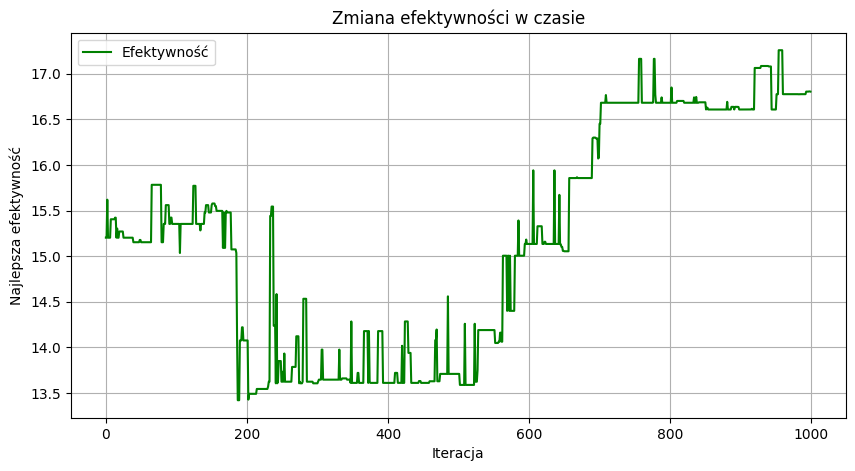

In [324]:
def algorytm_genetyczny(liczba_iteracji=1000, prawd_krzyzowania=0.75):
    bin_poczatek = pop_poczatek()
    najlepsze_efektywnosci = []
    
    for iteracja in range(1, liczba_iteracji + 1):
        przetworzona_populacja = {}
        for klucz, wartosc in bin_poczatek.items():
            cz1, cz2, cz3, cz4 = podziel_binarny(wartosc)
            param1 = bin_na_dzies(cz1)  # pojemnosc
            param2 = bin_na_dzies(cz2)  # spalanie
            param3 = bin_na_dzies(cz3)  # moc
            param4 = bin_na_dzies(cz4)  # masa

            pojemnosc, spalanie, moc, masa = mapuj_parametry(param1, param2, param3, param4)

            przetworzona_populacja[klucz] = {
                'pojemnosc': pojemnosc,
                'spalanie': spalanie,
                'moc': moc,
                'masa': masa
            }

        efektywnosci = {klucz: funkcja_przystosowania(
            wartosci['masa'],
            wartosci['pojemnosc'],
            wartosci['spalanie'],
            wartosci['moc'])
            for klucz, wartosci in przetworzona_populacja.items()}

        najlepszy_osobnik = max(efektywnosci, key=efektywnosci.get)
        najlepsza_ef = efektywnosci[najlepszy_osobnik]
        najlepsze_efektywnosci.append(najlepsza_ef)
        
        print(f"Najlepsza efektywność w tej iteracji: {najlepsza_ef}")

        #zapisanie parametrów najlepszego osobnika
        parametry = przetworzona_populacja[najlepszy_osobnik]

        print(f"--- Iteracja {iteracja} ---")
        print("Efektywności:", efektywnosci)

        wybrani_osobnicy = ruletka_wybor(efektywnosci)
        print("Wybrani osobnicy:", wybrani_osobnicy)

        nowa_populacja = {}
        for i in range(0, len(wybrani_osobnicy) - 1, 2):
            rodzic1 = bin_poczatek[wybrani_osobnicy[i]]
            rodzic2 = bin_poczatek[wybrani_osobnicy[i + 1]]

            if random.random() < prawd_krzyzowania:
                potomek1, potomek2 = krzyzowanie(rodzic1, rodzic2)
            else:
                potomek1, potomek2 = rodzic1, rodzic2  # bez krzyżowania

            nowa_populacja[f'ch{i+1}'] = mutacja(potomek1)
            nowa_populacja[f'ch{i+2}'] = mutacja(potomek2)


        bin_poczatek = nowa_populacja
        najlepsza_bin = bin_poczatek.get(najlepszy_osobnik, 'BRAK (możliwa zmiana indeksu po krzyżowaniu)') #zabezpieczenie przed utratą indeksu osobnika


        print("\n--- Najlepszy osobnik ---")
        print(f"Osobnik: {najlepszy_osobnik}, {najlepsza_bin}")
        print(f"Parametry: {formatuj_parametry(parametry)}\n")

# --- WYKRESY ---

    #efektywność (jak się zmieniała)
    plt.figure(figsize=(10, 5))
    plt.plot(najlepsze_efektywnosci, label='Efektywność', color='green')
    plt.xlabel("Iteracja")
    plt.ylabel("Najlepsza efektywność")
    plt.title("Zmiana efektywności w czasie")
    plt.grid()
    plt.legend()
    plt.show()

    zapis = {
    "efektywnosc": najlepsze_efektywnosci[-1],
    "parametry": formatuj_parametry(parametry)
    }
    
    #tylko zmieniać nazwy pliku
    #with open("mut001_wyniki_pojedyncze_1000.json", "a") as f: 
        #json.dump(zapis, f)
        #f.write("\n")  #każda linia to jedno uruchomienie

#uruchomienie algorytmu
algorytm_genetyczny(liczba_iteracji=1000)